This notebook is used for solving the problem sets in the given chapter. 

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# **Problem 2.3** 

Consider reformulating linear regression as a generative model so we have x =
g[y, ϕ] = ϕ0+ϕ1y. What is the new loss function? Find an expression for the inverse function y =
g−1[x,ϕ] that we would use to perform inference. Will this model make the same predictions
as the discriminative version for a given training dataset {xi,yi}? One way to establish this is
to write code that fits a line to three data points using both methods and see if the result is the
same.

Let's find the expression for the inverse function first. This just means we are trying to express y as a function of x for the discriminative function: 

$$
y = \frac{x-\phi_{0}}{\phi_1}
$$

Rewriting it in a linear regression format, with an intercept and a weight this is:
$$
y = -\frac{\phi_0}{\phi_1} + \frac{1}{\phi_1}x
$$


In [15]:
# reusing the data and functions from the chapter notebook
# Create some input / output data
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

In [16]:
# Define 1D linear regression model
def f(x, phi0, phi1):
  # TODO :  Replace this line with the linear regression model (eq 2.4)
  y = phi0 + phi1*x

  return y

In [22]:
# copying the plotting function from the chapter
# Function to help plot the data
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()

In [23]:
# Let's first fit the discriminative model - linear regression of y and x
X = np.vstack([np.ones_like(x), x]).T
weights, *_ = np.linalg.lstsq(X, y)

For legibility purposes, I will express the discriminative model as:
$$
y = \theta_0 + \theta_1 x
$$

In [ ]:
theta_0, theta_1 = weights

In [26]:
# now the generative model - linear regression of y and x
Y = np.vstack([np.ones_like(y), y]).T
weights, *_ = np.linalg.lstsq(Y, x)

In [27]:
phi_0, phi_1 = weights
theta_0_gen = -phi_0/phi_1
theta_1_gen = 1/phi_1

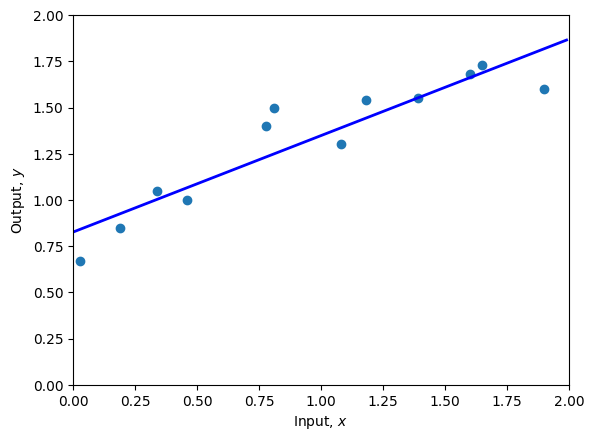

In [ ]:
# plotting discriminative model
plot(x, y, theta_0, theta_1)

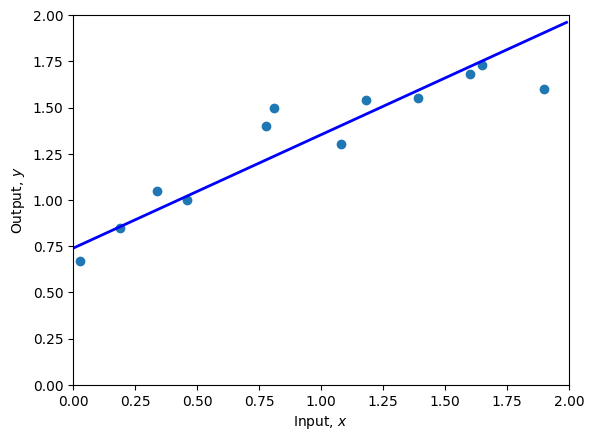

In [28]:
# plotting generative model
plot(x, y, theta_0_gen, theta_1_gen)

## Conclusion
The 2 generated lines are similar, but different. This is because the slope and intercept terms are not equal to each other between the generative and discriminative model. An intuitive reasoning for this is that when we are fitting a best line to x (discriminative model), we are trying to minimize the loss of this line with respect to y - this loss is the loss represented on the vertical axis. 

When we try to fit the best line to y (generative model), we are trying to minimize the loss of this line with respect to x - which is represented on the horizontal axis. The minimization of these errors does not necessarily result in the same solution.